In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

2025-02-09 17:21:27.769285: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 17:21:27.772865: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-09 17:21:27.783896: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739092887.802693   32199 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739092887.807936   32199 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-09 17:21:27.827752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [24]:
dataset = 'random.csv'
model_save_path = 'pose_detector_with_random.keras'
model_save_name = 'pose_detector_with_random'
model_tflite_name = 'pose_detector_with_random.tflite'

In [25]:
NUM_CLASSES = 7

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(2, 10 + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
# y_dataset = y_dataset - 1

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.80, random_state=RANDOM_SEED)

# Model building

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((9, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [31]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │            77 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 487 (1.90 KB)

 Trainable params: 487 (1.90 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
# Model checkpoint callback
# path_model = os.path.dirname(model_save_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_save_path, verbose=1, save_weights_only=False
)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [33]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [34]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
490/523 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1937 - loss: 9.6929 
Epoch 1: saving model to pose_detector_with_random.keras
523/523 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1951 - loss: 9.3731 - val_accuracy: 0.2592 - val_loss: 1.7120
Epoch 2/1000
498/523 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2537 - loss: 1.8654
Epoch 2: saving model to pose_detector_with_random.keras
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2545 - loss: 1.8620 - val_accuracy: 0.4822 - val_loss: 1.5198
Epoch 3/1000
494/523 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3343 - loss: 1.6518
Epoch 3: saving model to pose_detector_with_random.keras
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3350 - loss: 1.6503 - val_accuracy: 0.5052 - val_loss: 1.4044
Epoch 4/1000
523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3727 - loss: 1.5629
Epoch 4: saving model to pose_detector_with_random.keras
523/523 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3727 - loss: 

In [35]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7345 - loss: 0.8360


In [36]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [37]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[1.7099488e-01 7.0174855e-01 4.1761674e-02 2.2001740e-09 2.7045500e-04
 1.8257821e-03 8.3398744e-02]
1


# Save Model to TFfile

In [38]:
model.export(model_save_name)

INFO:tensorflow:Assets written to: pose_detector_with_random/assets


INFO:tensorflow:Assets written to: pose_detector_with_random/assets


Saved artifact at 'pose_detector_with_random'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 9), dtype=tf.float32, name='input_layer_1')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  139918759695408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139918759567328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139918759699632: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139921026761120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139921026769744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139921026771504: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [39]:
converter = tf.lite.TFLiteConverter.from_saved_model(model_save_name)
tflite_model = converter.convert()

W0000 00:00:1739093476.062729   32199 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1739093476.062754   32199 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2025-02-09 17:31:16.062963: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: pose_detector_with_random
2025-02-09 17:31:16.063658: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2025-02-09 17:31:16.063671: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: pose_detector_with_random
2025-02-09 17:31:16.067440: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2025-02-09 17:31:16.087298: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: pose_detector_with_random
2025-02-09 17:31:16.094029: I tensorflow/cc/saved_model/loader.cc:466] SavedModel load for tags { serve }; Status: success: OK. Took 31070 microseconds.


In [40]:
with open(model_tflite_name, 'wb') as f:
    f.write(tflite_model)

# Confussion Matrix

523/523 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


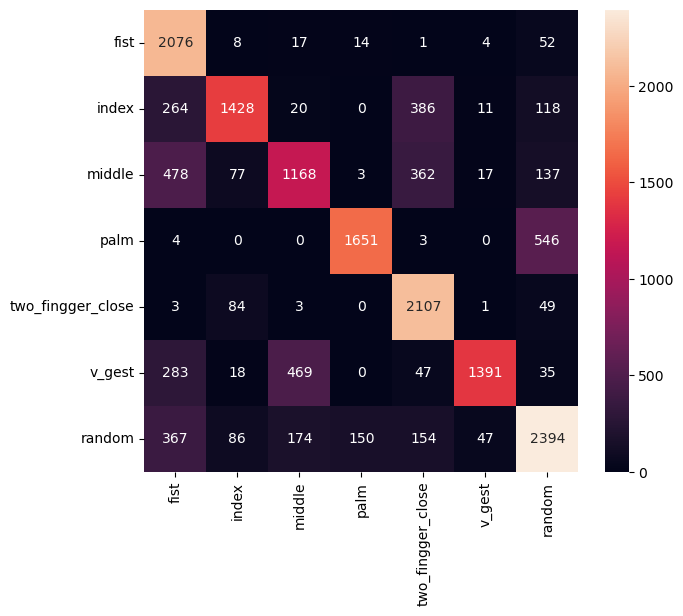

Classification Report
              precision    recall  f1-score   support

           0       0.60      0.96      0.74      2172
           1       0.84      0.64      0.73      2227
           2       0.63      0.52      0.57      2242
           3       0.91      0.75      0.82      2204
           4       0.69      0.94      0.79      2247
           5       0.95      0.62      0.75      2243
           6       0.72      0.71      0.71      3372

    accuracy                           0.73     16707
   macro avg       0.76      0.73      0.73     16707
weighted avg       0.76      0.73      0.73     16707



In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    label_name = ['fist', 'index', 'middle', 'palm', 'two_fingger_close', 'v_gest', 'random']
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=label_name, columns=label_name)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)